In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d jillanisofttech/updated-resume-dataset

Dataset URL: https://www.kaggle.com/datasets/jillanisofttech/updated-resume-dataset
License(s): CC0-1.0
updated-resume-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "/content/updated-resume-dataset.zip" # Changed the file name to the correct one.
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**Library**

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image # No change needed here
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras
from tensorflow.keras.models import Sequential # Import from tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import cv2
import tensorflow as tf

from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
data=pd.read_csv("/content/UpdatedResumeDataSet.csv")
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
data.shape

(962, 2)

**Exploring Category**

In [ ]:
data['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


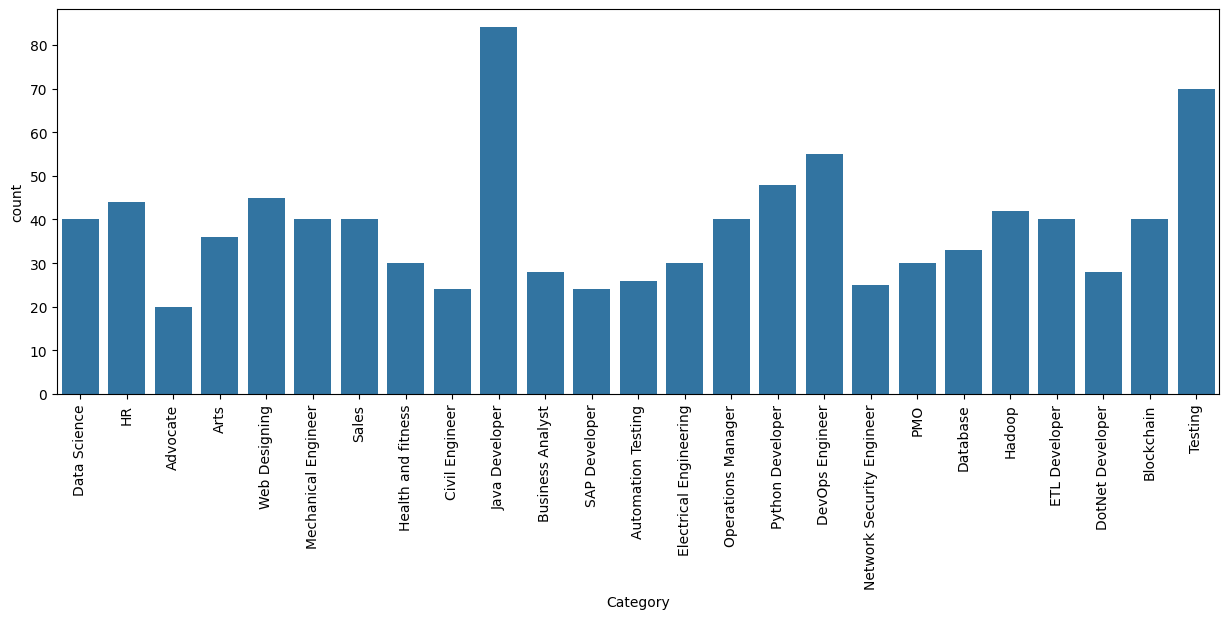

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=data)  # Set 'Category' as x-axis
plt.xticks(rotation=90)  # Uncomment this line to rotate the x-axis labels if needed
plt.show()

In [ ]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

**Exploring Resume**

In [ ]:
data['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
data['Category'][0]

'Data Science'

**PreProcessing Data**

**Convert the Categorical to numerical**

In [ ]:
label_mapping = {
    'Data Science': 0,
    'HR': 1,
    'Advocate': 2,
    'Arts': 3,
    'Web Designing': 4,
    'Mechanical Engineer': 5,
    'Sales': 6,
    'Health and fitness': 7,
    'Civil Engineer': 8,
    'Java Developer': 9,
    'Business Analyst': 10,
    'SAP Developer': 11,
    'Automation Testing': 12,
    'Electrical Engineering': 13,
    'Operations Manager': 14,
    'Python Developer': 15,
    'DevOps Engineer': 16,
    'Network Security Engineer': 17,
    'PMO': 18,
    'Database': 19,
    'Hadoop': 20,
    'ETL Developer': 21,
    'DotNet Developer': 22,
    'Blockchain': 23,
    'Testing': 24
}

# Convert the 'Category' column using the mapping
data['Category'] = data['Category'].map(label_mapping)





In [ ]:
data.head(-1)

,Category,Resume
0,0,Skills * Programming Languages: Python (pandas...
1,0,Education Details \r\nMay 2013 to May 2017 B.E...
2,0,"Areas of Interest Deep Learning, Control Syste..."
3,0,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,0,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
956,24,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
957,24,Computer Skills: â¢ Proficient in MS office (...
958,24,â Willingness to accept the challenges. â ...
959,24,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."


In [ ]:
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary

    # Convert text to lowercase
    text = text.lower()

    # Remove specific unwanted characters
    text = text.replace('â¢', '')
    text = text.replace('â', '')  # Remove the additional unwanted character

    # Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove emoticons and other symbols
    regex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    text = regex_pattern.sub(r'', text)

    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]

    # Join words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Apply the preprocessing to the 'Resume' column and store in 'cleaned_resume'
data['cleaned_resume'] = data['Resume'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Display the first few rows of the updated DataFrame
data.head(-1)

,Category,Resume,cleaned_resume
0,0,Skills * Programming Languages: Python (pandas...,skills program languages python pandas numpy s...
1,0,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uitrgpv data scientis...
2,0,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learn control system desig...
3,0,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,0,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
...,...,...,...
956,24,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...,computer proficiency basic msoffice powerpoint...
957,24,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient ms office word basi...
958,24,â Willingness to accept the challenges. â ...,willingness accept challenge positive think go...
959,24,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_resume'], data['Category'], test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f'Training set: X_train shape = {len(X_train)}, y_train shape = {len(y_train)}')
print(f'Validation set: X_val shape = {len(X_val)}, y_val shape = {len(y_val)}')
print(f'Test set: X_test shape = {len(X_test)}, y_test shape = {len(y_test)}')

# Tokenize the text data
max_words = 10000  # Vocabulary size
max_sequence_length = 100  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_val_sequences = tokenizer.texts_to_sequences(X_val)  # Tokenize validation set

print("Training X Shape:", len(X_train_sequences))
print("Testing X Shape:", len(X_test_sequences))
print("Validation X Shape:", len(X_val_sequences))

# Pad sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length)  # Pad validation set


# Convert labels to categorical (one-hot encoding)
num_classes = len(set(y_train))  # Calculate the number of unique classes in y_train
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)  # One-hot encode validation labels


Training set: X_train shape = 615, y_train shape = 615
Validation set: X_val shape = 154, y_val shape = 154
Test set: X_test shape = 193, y_test shape = 193
Training X Shape: 615
Testing X Shape: 193
Validation X Shape: 154


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout
# # Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_val_padded, y_val))



Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.0881 - loss: 3.1890 - val_accuracy: 0.1818 - val_loss: 3.0916
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.1867 - loss: 2.9217 - val_accuracy: 0.2532 - val_loss: 2.4332
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.2849 - loss: 2.1919 - val_accuracy: 0.4610 - val_loss: 1.7960
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.5203 - loss: 1.4986 - val_accuracy: 0.5909 - val_loss: 1.3396
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.6620 - loss: 1.1779 - val_accuracy: 0.7597 - val_loss: 0.9435
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.7966 - loss: 0.7404 - val_accuracy: 0.7792 - val_loss: 0.7701
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.8539 - loss: 0.5242 - val_accuracy: 0.9221 - val_loss: 0.3635
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9059 - loss: 0.3771 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9856 - loss: 0.1261
Test Loss: 0.15407074987888336
Test Accuracy: 0.9792746305465698


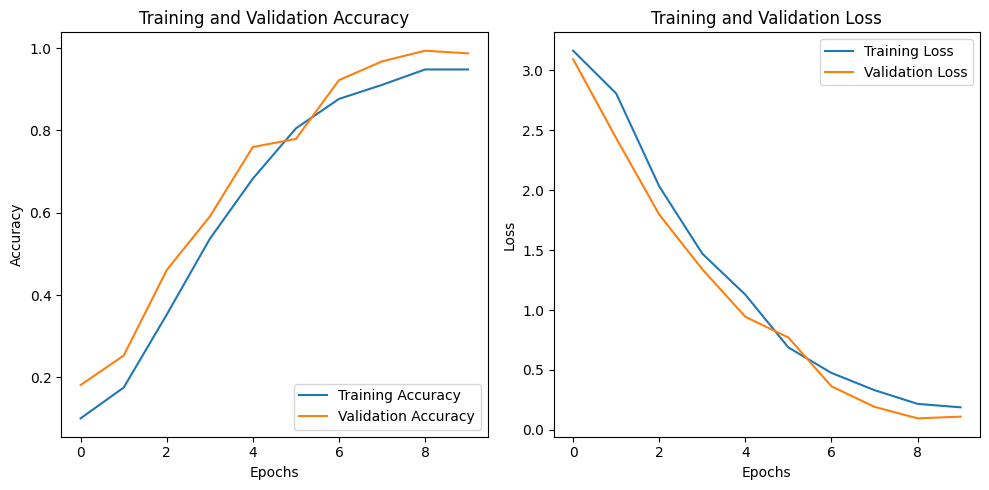

In [ ]:
import matplotlib.pyplot as plt

# Assume the number of epochs
EPOCHS = 10

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(EPOCHS), history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label="Training Loss")
plt.plot(range(EPOCHS), history.history['val_loss'], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import save_model

# Save the entire model (architecture, weights, optimizer state)
model.save('resume_model.keras')  # Specify the path where you want to save the model


In [ ]:
# Save the tokenizer
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as json_file:
    json_file.write(tokenizer_json)

In [ ]:
# json_string=model.to_json()

In [ ]:

# Save the model architecture to a JSON file
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model.to_json())


In [ ]:
# Save the model architecture to a JSON file
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model.to_json())
